# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import os
import seaborn as sns
import cufflinks as cf
cf.go_offline()

# Load File

In [2]:
os.getcwd()

'C:\\Users\\DiDi\\Documents\\Deni\\Diplomado\\Cuarto Módulo\\Practica_1'

In [3]:
df= pd.read_csv('AER_credit_card_data.csv')

In [4]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
df.tail()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1314,yes,0,33.58333,4.566,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.192,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.600,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.700,0.008999,26.996670,no,yes,0,60,1,7
1318,yes,0,48.25000,3.700,0.111619,344.157500,yes,no,2,2,1,0


# EDA (Exploratory Data Analysis)

In [6]:
df.shape

(1319, 12)

Number of rows

In [7]:
df.shape[0]

1319

Number of columns

In [8]:
df.shape[1]

12

Column names

In [9]:
df.columns.values.tolist()

['card',
 'reports',
 'age',
 'income',
 'share',
 'expenditure',
 'owner',
 'selfemp',
 'dependents',
 'months',
 'majorcards',
 'active']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
card           1319 non-null object
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null object
selfemp        1319 non-null object
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [11]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


Seems like data have many outliers or strange values, for example the column "age" which min value is .16 and the max is 83. We'll land it in the next practice. Also appears that the column "active" has outliers.

Null percentage

In [12]:
df.isnull().sum()/df.shape[0]

card           0.0
reports        0.0
age            0.0
income         0.0
share          0.0
expenditure    0.0
owner          0.0
selfemp        0.0
dependents     0.0
months         0.0
majorcards     0.0
active         0.0
dtype: float64

Null percentage visually

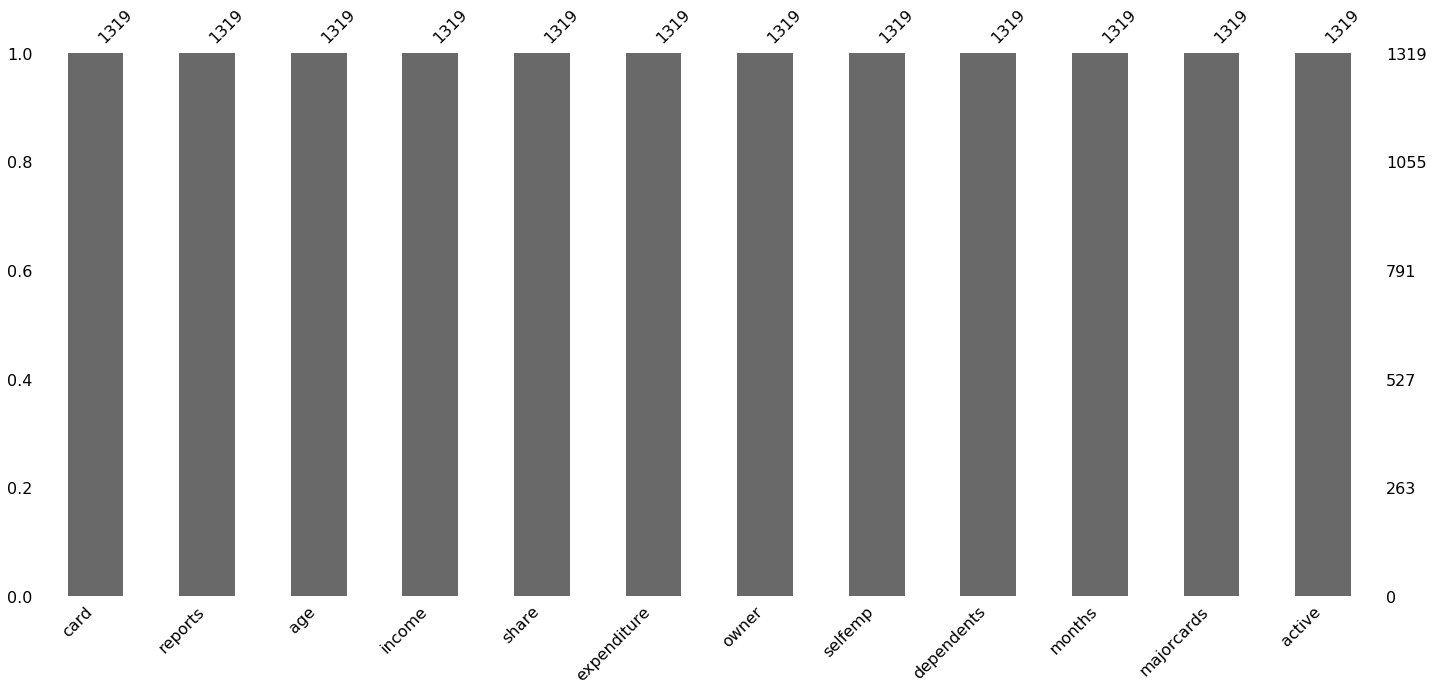

In [13]:
msno.bar(df)

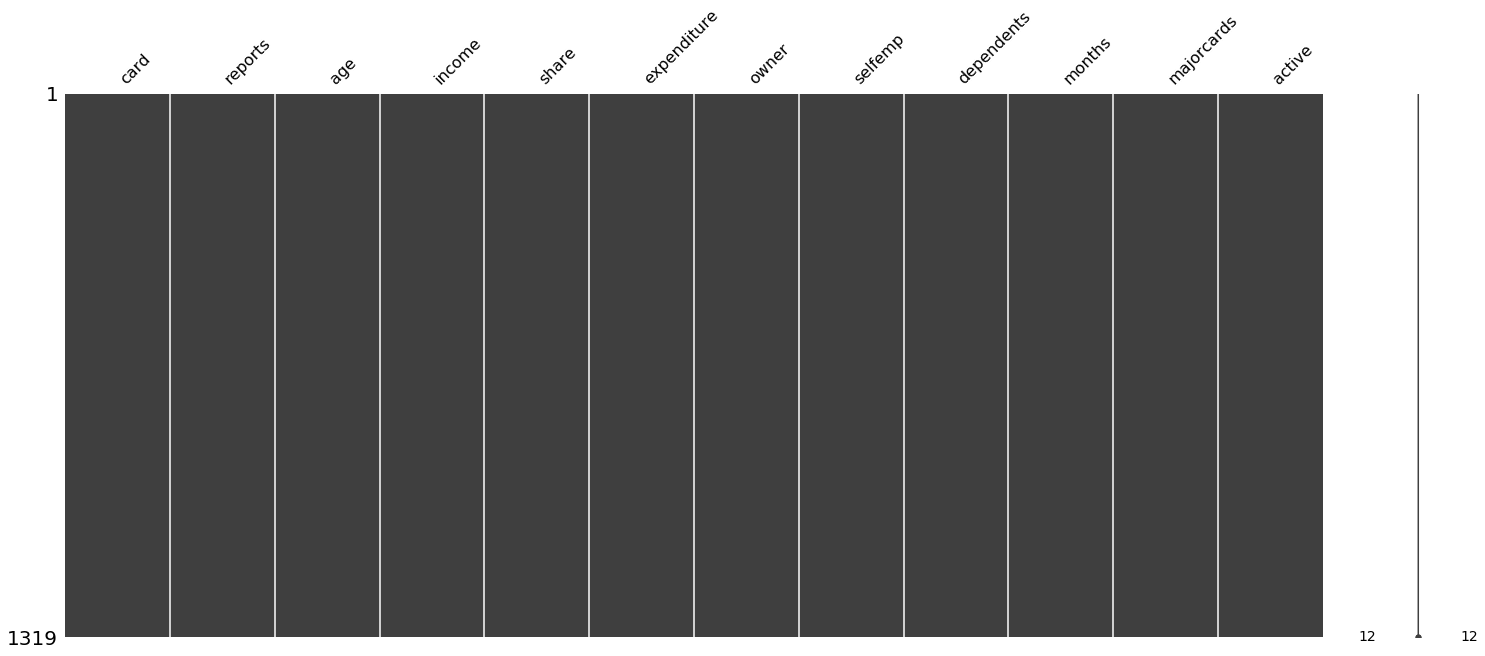

In [14]:
msno.matrix(df)

Check the sample unit

In [15]:
df.nunique()/df.shape[0]

card           0.001516
reports        0.009856
age            0.316907
income         0.326763
share          0.880970
expenditure    0.743745
owner          0.001516
selfemp        0.001516
dependents     0.005307
months         0.146323
majorcards     0.001516
active         0.026535
dtype: float64

Something strange... any variable is unique. Is there no sampling unit? We'll see it in the next practice.

Reviewing the type of data that are inside the columns (series)

In [16]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

## Correlation

 Correlation matrix plot

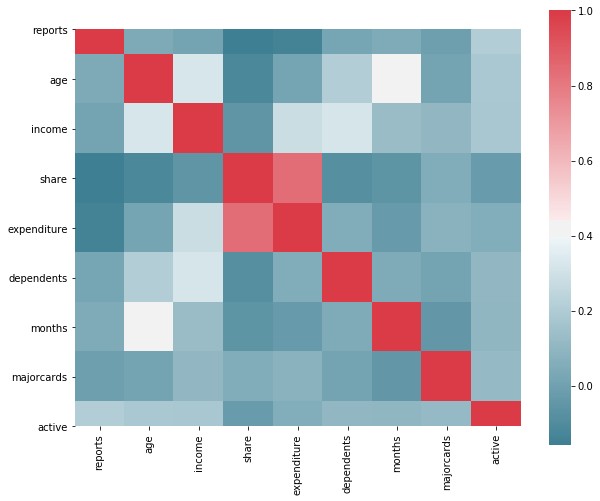

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

We can see that the variables that have the highest positive correlation between expenditure and share. Makes sense because share it's the ratio of monthly credit card expenditure to yearly income and expenditure it's the average monthly credit card expenditure. 

Scatter Plots

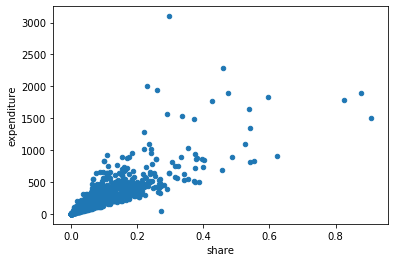

In [18]:
df.plot(kind='scatter',x='share',y='expenditure')

In the last scatter plot we can see that doesn´t exist a perfect linear relationship (with positive slope) but the point are together in a positive way.

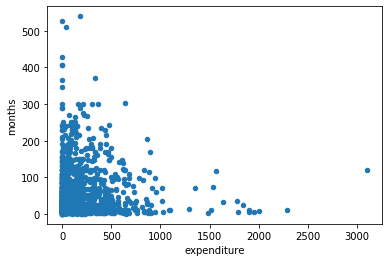

In [23]:
df.plot(kind='scatter',x='expenditure',y='months')

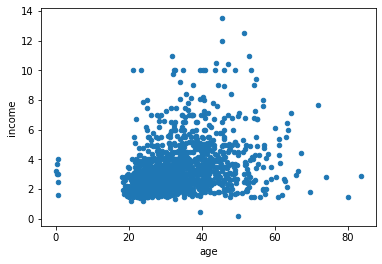

In [22]:
df.plot(kind='scatter',x='age',y='income')

In the last two scatter plots doesn´t exist linear correlation.

## Histograms

In [25]:
df.columns.to_list()

['card',
 'reports',
 'age',
 'income',
 'share',
 'expenditure',
 'owner',
 'selfemp',
 'dependents',
 'months',
 'majorcards',
 'active']

In [26]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Count Values for variable 'reports'

In [27]:
df['reports'].value_counts().sort_index()

0     1060
1      137
2       50
3       24
4       17
5       11
6        5
7        6
9        2
10       1
11       4
12       1
14       1
Name: reports, dtype: int64

Text(0.5, 1.0, 'Frequency of Reports')

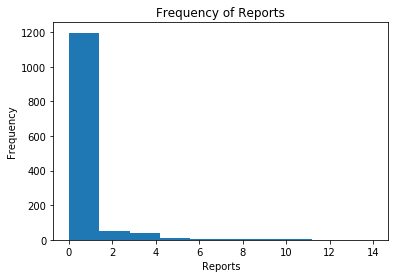

In [29]:
plt.hist(df['reports'])
plt.xlabel('Reports')
plt.ylabel('Frequency')
plt.title('Frequency of Reports')

We'll do the same histogram but using iplot. If you want thought highly better the histogram,you can do zoom on in.

In [32]:
df['reports'].iplot(kind='histogram');

reports: Number of major derogatory reports. 

Most of the cases aren't derogatory reports. 

Text(0.5, 1.0, 'Frequency of dependents')

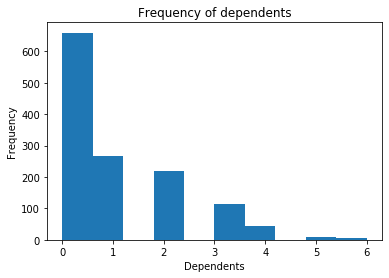

In [33]:
plt.hist(df['dependents'])
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.title('Frequency of dependents')

In [34]:
df['dependents'].iplot(kind='histogram');

dependents: 1 + number of dependents

Most people only have one dependent.

In [36]:
df['majorcards'].value_counts()

1    1078
0     241
Name: majorcards, dtype: int64

Text(0.5, 1.0, 'Frequency of majorcards held')

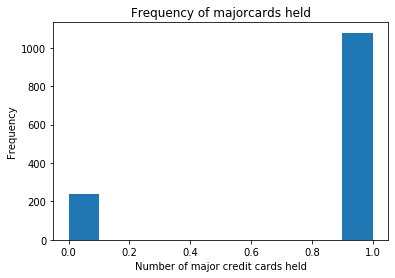

In [38]:
plt.hist(df['majorcards'])
plt.xlabel('Number of major credit cards held')
plt.ylabel('Frequency')
plt.title('Frequency of majorcards held')

In [ ]:
Most people has one majorcard credit held.

Text(0.5, 1.0, 'Frequency of active')

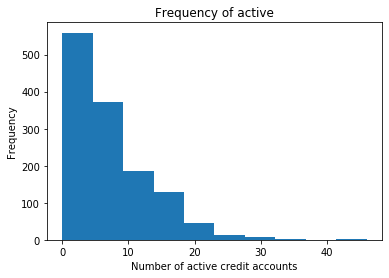

In [39]:
plt.hist(df['active'])
plt.xlabel('Number of active credit accounts')
plt.ylabel('Frequency')
plt.title('Frequency of active')

In [42]:
df['active'].iplot(kind='histogram');

In [40]:
df['active'].min()

0

In [41]:
df['active'].max()

46

We're going to define a function to segment the active by ranges.

In [45]:
def segment(active):
    categoria=None
    if 0<=active<=9:
        categoria='age_0'
    elif 10<=active<=19:
        categoria='age_10'
    elif 20<=active<=29:
        active='age_20'
    elif 30<=active<=39:
        categoria='age_30'
    elif 40<=active<=49:
        categoria='age_40'
        
    return categoria

Mapping the function to the column 'active'

In [46]:
df['range_active']=df['active'].map(segment)

Count Values for variable 'RANGE_AGE'

In [48]:
df['range_active'].value_counts()

age_0     932
age_10    338
age_30      4
age_40      2
Name: range_active, dtype: int64

The active segment of the 0 has the highest frequency, that means most of people have less than 10 active credit accounts. Also we can see the segment of age_30 and age_40 has 4 and 2 active credit accounts respectively which is kind of weird and I'd be classifying them as outliers.